In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('predictive_maintenance.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns")

This data set has 10000 rows and 10 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


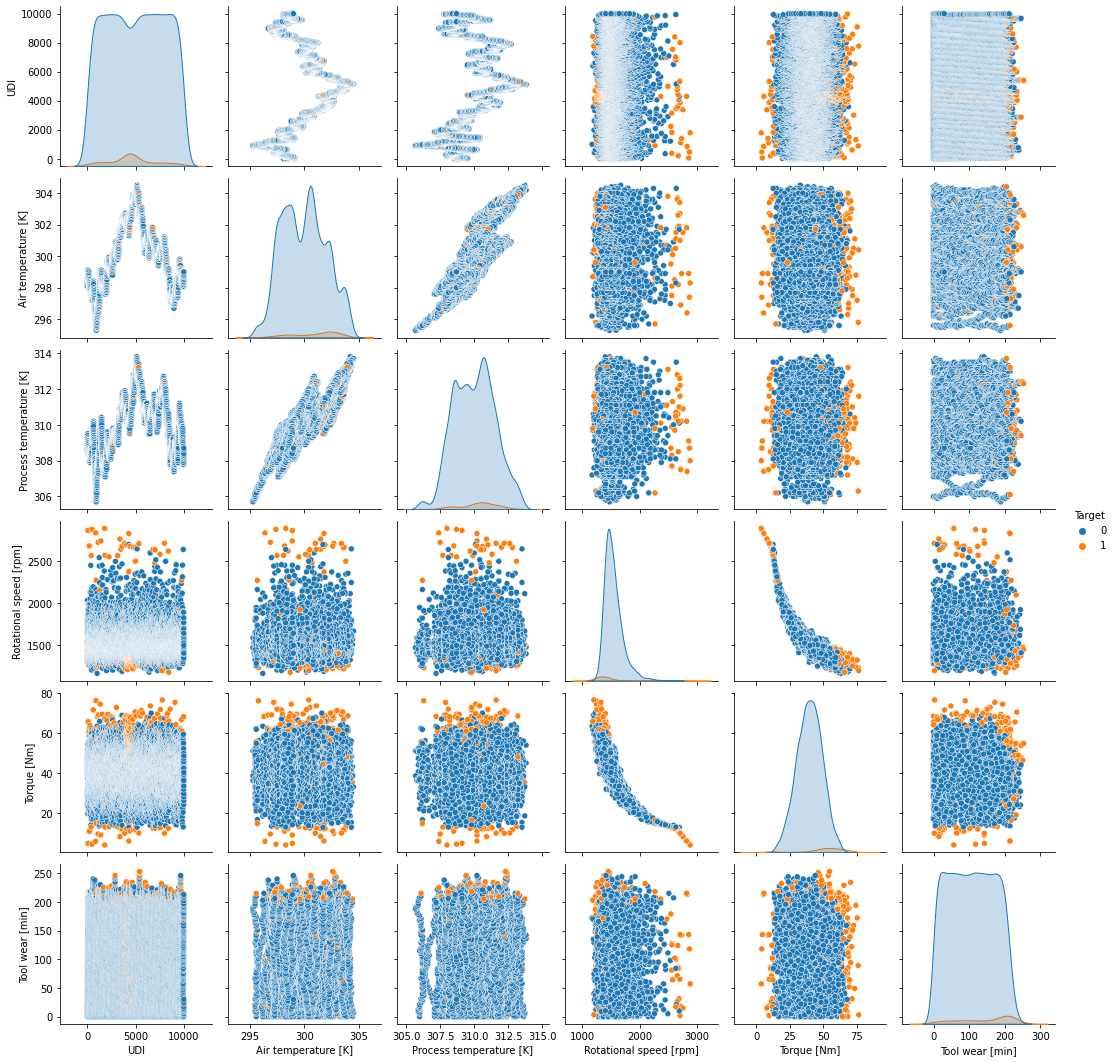

In [8]:
sns.pairplot(df,hue='Target')

##### As expected, torque and rotational speed are inversely related and process temperature and air temperature are somewhat (linearly) related

In [9]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [15]:
df['Product ID'].nunique() # As we can see, the product ID is unique to each case

10000

In [16]:
df['Type'].nunique() # Our Type column is a string and it is categorical so we should be aiming for dummy variables

3

In [17]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [24]:
##Type categorical feature dummy variables for model compatibility
 
type_dummy = pd.get_dummies(df['Type'], drop_first=True)
type_dummy.head()

,L,M
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
# I will be droppng some columns which are neither numerical nor categorical and don't tell us anything important such as UDI
# I also removed the Failure Type column because this is a binary classification model project 

df.drop(['UDI', 'Product ID', 'Type', 'Failure Type'], axis=1, inplace=True)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [31]:
df = pd.concat([df, type_dummy],axis=1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0


In [32]:
df.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'L', 'M'],
      dtype='object')

In [33]:
column_rearrangement = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'L', 'M', 'Target']

In [34]:
df = df.reindex(columns=column_rearrangement)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],L,M,Target
0,298.1,308.6,1551,42.8,0,0,1,0
1,298.2,308.7,1408,46.3,3,1,0,0
2,298.1,308.5,1498,49.4,5,1,0,0
3,298.2,308.6,1433,39.5,7,1,0,0
4,298.2,308.7,1408,40.0,9,1,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   L                        10000 non-null  uint8  
 6   M                        10000 non-null  uint8  
 7   Target                   10000 non-null  int64  
dtypes: float64(3), int64(3), uint8(2)
memory usage: 488.4 KB


In [37]:
df['Target'].unique()

array([0, 1], dtype=int64)

In [40]:
X = np.asarray(df.drop('Target',axis=1))
X


array([[2.981e+02, 3.086e+02, 1.551e+03, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.982e+02, 3.087e+02, 1.408e+03, ..., 3.000e+00, 1.000e+00,
        0.000e+00],
       [2.981e+02, 3.085e+02, 1.498e+03, ..., 5.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.990e+02, 3.086e+02, 1.645e+03, ..., 2.200e+01, 0.000e+00,
        1.000e+00],
       [2.990e+02, 3.087e+02, 1.408e+03, ..., 2.500e+01, 0.000e+00,
        0.000e+00],
       [2.990e+02, 3.087e+02, 1.500e+03, ..., 3.000e+01, 0.000e+00,
        1.000e+00]])

In [42]:
y = np.asarray(df['Target'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### But before we start working on the data we need to standardize our data

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
X = StandardScaler().fit(X).transform(X)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
LR = LogisticRegression(C=0.01)

In [51]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [52]:
y_pred = LR.predict(X_test)

In [53]:
from sklearn.metrics import jaccard_score

In [58]:
jaccard_score(y_test,y_pred,pos_label=0) # A high jaccard score means there great similarity with our model

0.9693939393939394

In [59]:
#Visualizing our confusion matrix 
cm_dict = {'y_actual': y_test, 'y_predictions': y_pred}
cm_df = pd.DataFrame(cm_dict,columns = ['y_actual', 'y_predictions'])

In [60]:
cm = pd.crosstab(cm_df['y_actual'], cm_df['y_predictions'], rownames=['Actual'], colnames=['Predicted'])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

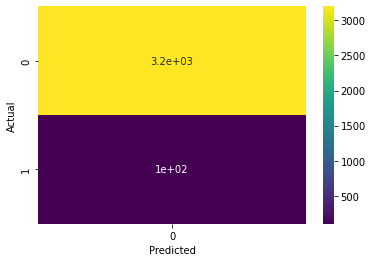

In [61]:
sns.heatmap(cm,cmap='viridis',annot=True)

#### Most of our data entries were not faulty so it makes sense that our test data were not faulty

In [66]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],L,M,Target
0,298.1,308.6,1551,42.8,0,0,1,0
1,298.2,308.7,1408,46.3,3,1,0,0
2,298.1,308.5,1498,49.4,5,1,0,0
3,298.2,308.6,1433,39.5,7,1,0,0
4,298.2,308.7,1408,40.0,9,1,0,0


In [70]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [88]:
print(f"The ratio of non-faulty to faulty cases in our data set were: \nNon-Faulty:{df['Target'].value_counts()[0]}\nFaulty:{df['Target'].value_counts()[1]}\nPercentage_ratio: {round(df['Target'].value_counts()[1]/df['Target'].value_counts()[0] * 100,2)} % ")

The ratio of non-faulty to faulty cases in our data set were: 
Non-Faulty:9661
Faulty:339
Percentage_ratio: 3.51 % 


##### <b/> While our data has a good output, we have to remember that our data was skewed towards Non-Faulty test cases and I considered that while choosing the 'C' hyperparameter for our Logistic Regression model <b> also it is very important to note that Machine Learning algorithms are Garbage In, Garbage Out so theoretical knowledge of the field being explored is paramount and can't be replaced   

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3199
           1       0.00      0.00      0.00       101

    accuracy                           0.97      3300
   macro avg       0.48      0.50      0.49      3300
weighted avg       0.94      0.97      0.95      3300



C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tayoo_x4di65g\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi